# Integration of on-line trajectory generator in eTaSL

In [59]:
from matplotlib import pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; } </style>"))

In [60]:
joint_angles = np.loadtxt('test.out')
qx_sol = joint_angles[:,0]
qy_sol = joint_angles[:,1]
qz_sol = joint_angles[:,2]
N=len(joint_angles)
print N

380


In [62]:
traj = np.loadtxt('traj1.txt')
traj36 = np.loadtxt('traj36.txt')

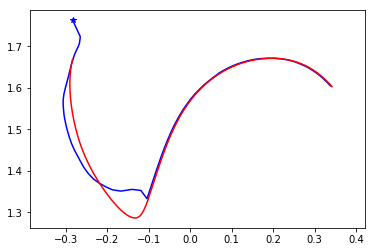

In [64]:
ee_x = qx_sol
ee_y = qy_sol
ee_z = qz_sol
plt.axis('equal')
plt.plot(ee_x,ee_z,'b-')
plt.plot(ee_x[-1],ee_z[-1],'b*')
plt.plot(traj[:,0],traj[:,2],'r')
#plt.plot(traj36[:,0],traj36[:,2],'g')


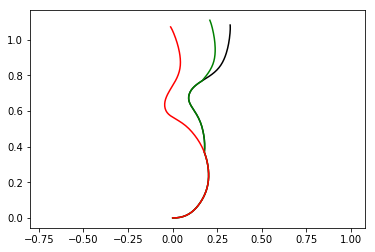

In [5]:
%matplotlib inline
plt.axis('equal')
plt.plot(traj2[:,0],traj2[:,1],'k')
plt.plot(traj3[:,0],traj3[:,1],'g')
plt.plot(traj1[:,0],traj1[:,1],'r')

## Developed approach consists of three parts:

1. global trajectory generator (slow) -- global generator/optimizer of trajectory, confusion:"global trajectory"
1. position and velocity setpoint generator 
1. etasl controller

<IPython.core.display.Javascript object>


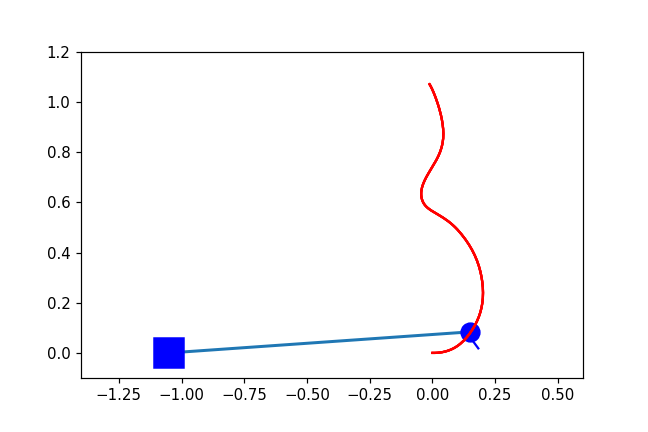

In [8]:
%matplotlib notebook
from matplotlib import animation

# **TODO** Move code below to separate function
link1x = qx_sol
link1y = 0
p_x = ee_x
p_y = ee_y

fig, ax = plt.subplots()
plt.axis('equal')


line, = ax.plot([], [], linewidth=2)
marker1, = ax.plot([], [],marker=".",color='b',markersize=25)
marker2, = ax.plot([], [],marker="s",color='b',markersize=20)

tp2, = ax.plot([], [],color='g')
tp3, = ax.plot([], [],color='k')
eep, = ax.plot([], [],color='b')

def init():
    line.set_data([],[])
    marker1.set_data([],[])
    marker2.set_data([],[])
    #ax.plot(ee_x,ee_y,'b')
    ax.plot(traj1[:,0],traj1[:,1],'r')
    ax.set_xlim((-1.2, 0.4))
    ax.set_ylim((-0.1, 1.2))
    tp2.set_data([],[])
    tp3.set_data([],[])
    eep.set_data([],[])
    return (line,marker1,marker2,tp2,tp3,eep,)

def animate(i):
    x = [link1x[i],p_x[i]]
    y = [0,p_y[i]]
    line.set_data(x, y)
    marker1.set_data(p_x[i],p_y[i])
    
    
    eep.set_data(ee_x[0:i],ee_y[0:i])
    
    if i>50:
        #ax.plot(traj2[:,0],traj2[:,1],'g')
        tp2.set_data(traj2[:,0],traj2[:,1])
    if i>100:
        tp3.set_data(traj3[:,0],traj3[:,1])
    
    marker2.set_data(link1x[i],0)
    return (line,marker1,tp2,tp3,eep,marker2,)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=170, interval=20, blit=True)

# Instead of %matplotlib notebook, you can also do the following
#from IPython.display import HTML
#HTML(ani.to_jshtml())

# Next steps

- **Feedback robot to trajectory generator**: at the moment new trajectories are generated starting from a trajectory point instead of the actual robot position
- **Trajectory interpolation**: at the moment the new position and velocity setpoints are taken from the closest trajectory point in time, better would be to do some interpolation to get the correct setpoints at the exact required time, e.g. using splines
- **Include on-line trajectory generation from invariants**: in the current experiment the trajectories were precomputed

- **Question**: How do I get my setpoints in Orocos?


## Discussion

- Makes more sense to give a trajectory segment directly to etasl, because then also no time delays
- Define better how to go from old to new trajectory: now based on time, but probably not good, better to have something based on geometry